In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
!git clone https://github.com/indirafsyzhr/negara.git

fatal: destination path 'negara' already exists and is not an empty directory.


In [29]:
df = pd.read_csv('negara/Data_Negara_HELP.csv')
df.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [30]:
df = df.set_index('Negara')
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


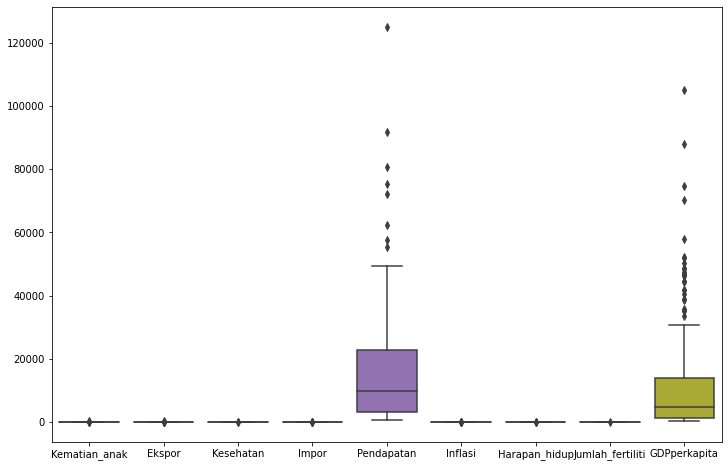

In [7]:
df_coba = df[['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']]
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_coba)
plt.show()

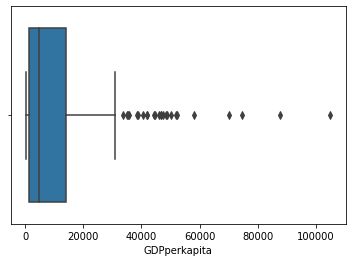

In [8]:
sns.boxplot(x='GDPperkapita', data=df)

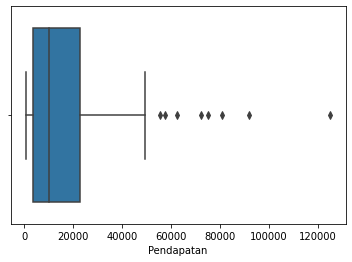

In [9]:
sns.boxplot(x='Pendapatan', data=df)

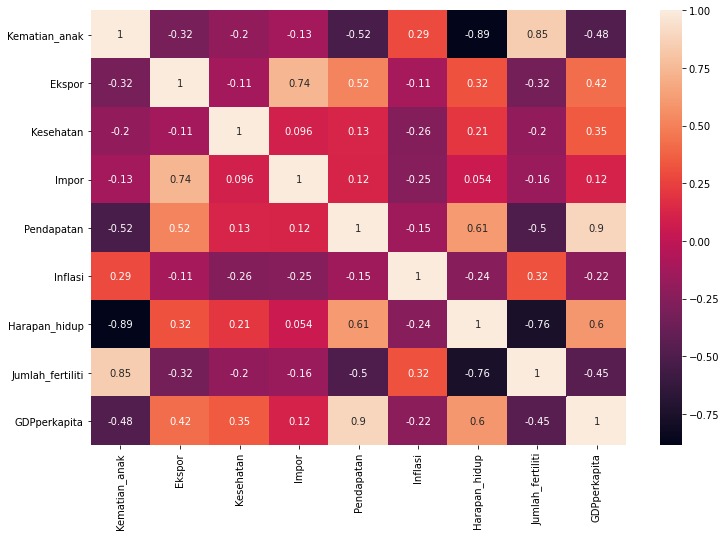

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

In [11]:
df.duplicated().sum()

0

In [5]:
def finding_outlier(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  df_final = df[(df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr)))]
  return df_final

In [6]:
print(finding_outlier(df['Kematian_anak']).count())
print(finding_outlier(df['Ekspor']).count())
print(finding_outlier(df['Kesehatan']).count())
print(finding_outlier(df['Impor']).count())
print(finding_outlier(df['Pendapatan']).count())
print(finding_outlier(df['Inflasi']).count())
print(finding_outlier(df['Harapan_hidup']).count())
print(finding_outlier(df['Jumlah_fertiliti']).count())
print(finding_outlier(df['GDPperkapita']).count())

4
5
2
4
8
5
3
1
25


In [7]:
def remove_outlier(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  df_final = df[~((df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr))))]
  return df_final

In [31]:
df = remove_outlier(df[['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,NaN,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


In [9]:
df.isnull().sum()

Kematian_anak        4
Ekspor               5
Kesehatan            2
Impor                4
Pendapatan           8
Inflasi              5
Harapan_hidup        3
Jumlah_fertiliti     1
GDPperkapita        25
dtype: int64

In [32]:
df.dropna(axis=0, inplace=True)

In [34]:
df.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df.astype(float))
df_std

AttributeError: ignored

In [12]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 3).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [23]:
df_new = pd.DataFrame(data=df_std, columns=['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
df['label1_kmeans'] = labels1
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,2
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,0
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,0
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,2
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,1
...,...,...,...,...,...,...,...,...,...,...
123,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,0
124,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,0
125,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,0
126,0.517295,-0.396730,-0.528484,-0.605990,-0.685031,2.656388,-0.297378,1.129459,-0.719154,2


In [20]:
df_new[df_new['label1_kmeans']==1]

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,1
8,-0.738937,-0.129656,0.700866,-0.080618,1.206807,-1.263271,0.556327,-0.794955,3.032511,1
9,-0.892641,1.713156,-0.623748,0.326122,3.076049,0.016381,0.854446,-0.589502,2.006391,1
11,-0.727114,0.110711,0.737156,0.201840,0.426244,-1.146627,0.949302,-0.849743,1.345738,1
26,-0.889685,0.014564,0.732620,-0.781115,0.847337,0.264699,1.274523,-0.781258,0.909988,1
34,-0.984272,0.009223,0.641893,-0.396971,0.919231,-1.064943,0.895099,-1.007257,0.994327,1
35,-1.040433,0.682250,-0.170113,0.698967,2.336569,-0.870700,1.382930,-1.096287,3.426092,1
36,-1.046345,1.526204,0.696329,1.004022,1.761417,-1.432682,1.057709,-1.034651,1.879883,1
42,-1.013830,2.012279,-0.142895,1.331674,1.186265,-0.914809,0.854446,-0.890833,1.148947,1
48,-1.031566,-0.818707,1.794125,-0.815010,1.802499,-1.089122,1.450684,-1.055196,2.877890,1


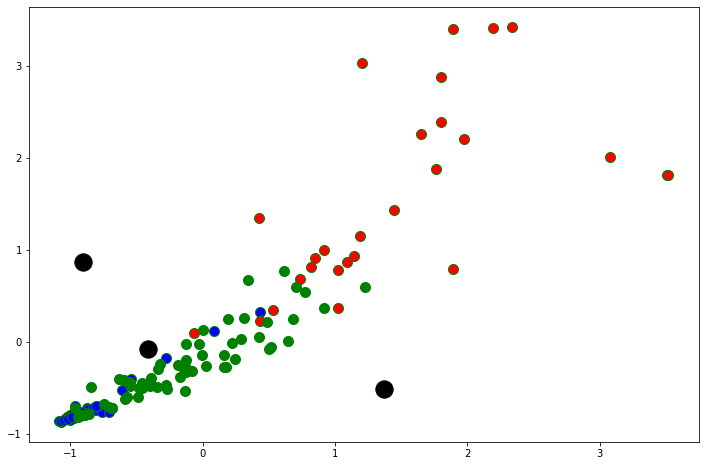

In [16]:
plt.figure(figsize=(12,8))

plt.scatter(df_new['Pendapatan'][df_new.label1_kmeans==0], df_new['GDPperkapita'][df_new.label1_kmeans==0], c='blue', s=100, edgecolor='green')
plt.scatter(df_new['Pendapatan'][df_new.label1_kmeans==1], df_new['GDPperkapita'][df_new.label1_kmeans==1], c='red', s=100, edgecolor='green')
plt.scatter(df_new['Pendapatan'][df_new.label1_kmeans==2], df_new['GDPperkapita'][df_new.label1_kmeans==2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='k', s=300)

plt.show()

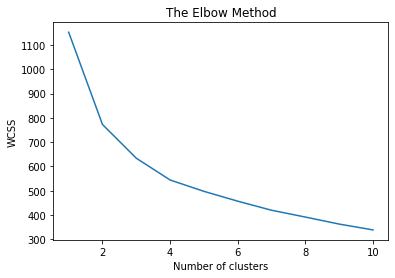

In [17]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels=labels1))

0.23572302378807583


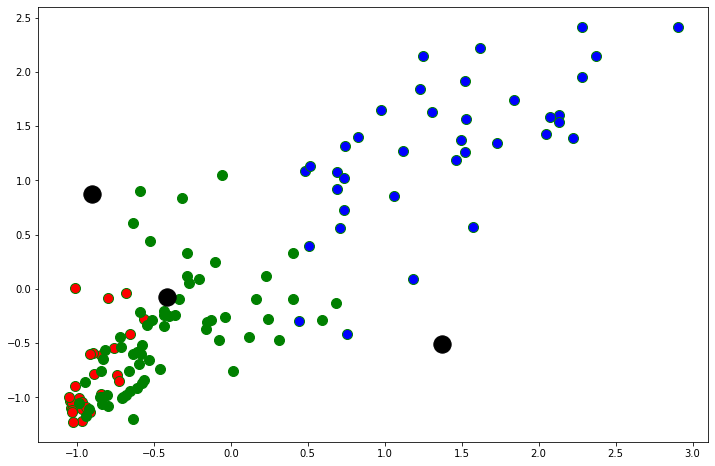

In [19]:
plt.figure(figsize=(12,8))

plt.scatter(df_new['Kematian_anak'][df_new.label1_kmeans==0], df_new['Jumlah_fertiliti'][df_new.label1_kmeans==0], c='blue', s=100, edgecolor='green')
plt.scatter(df_new['Kematian_anak'][df_new.label1_kmeans==1], df_new['Jumlah_fertiliti'][df_new.label1_kmeans==1], c='red', s=100, edgecolor='green')
plt.scatter(df_new['Kematian_anak'][df_new.label1_kmeans==2], df_new['Jumlah_fertiliti'][df_new.label1_kmeans==2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='k', s=300)

plt.show()